In [1]:
from lsst.daf.butler import Butler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib widget

In [2]:
butler = Butler('/repo/main', collections='u/leget/PFL_demo')

In [3]:
raw = butler.get('raw', detector=36, exposure=26032)
current = butler.get('postISRCCD', detector=36, exposure=26032)

(-0.5, 2143.5, 4240.5, -0.5)

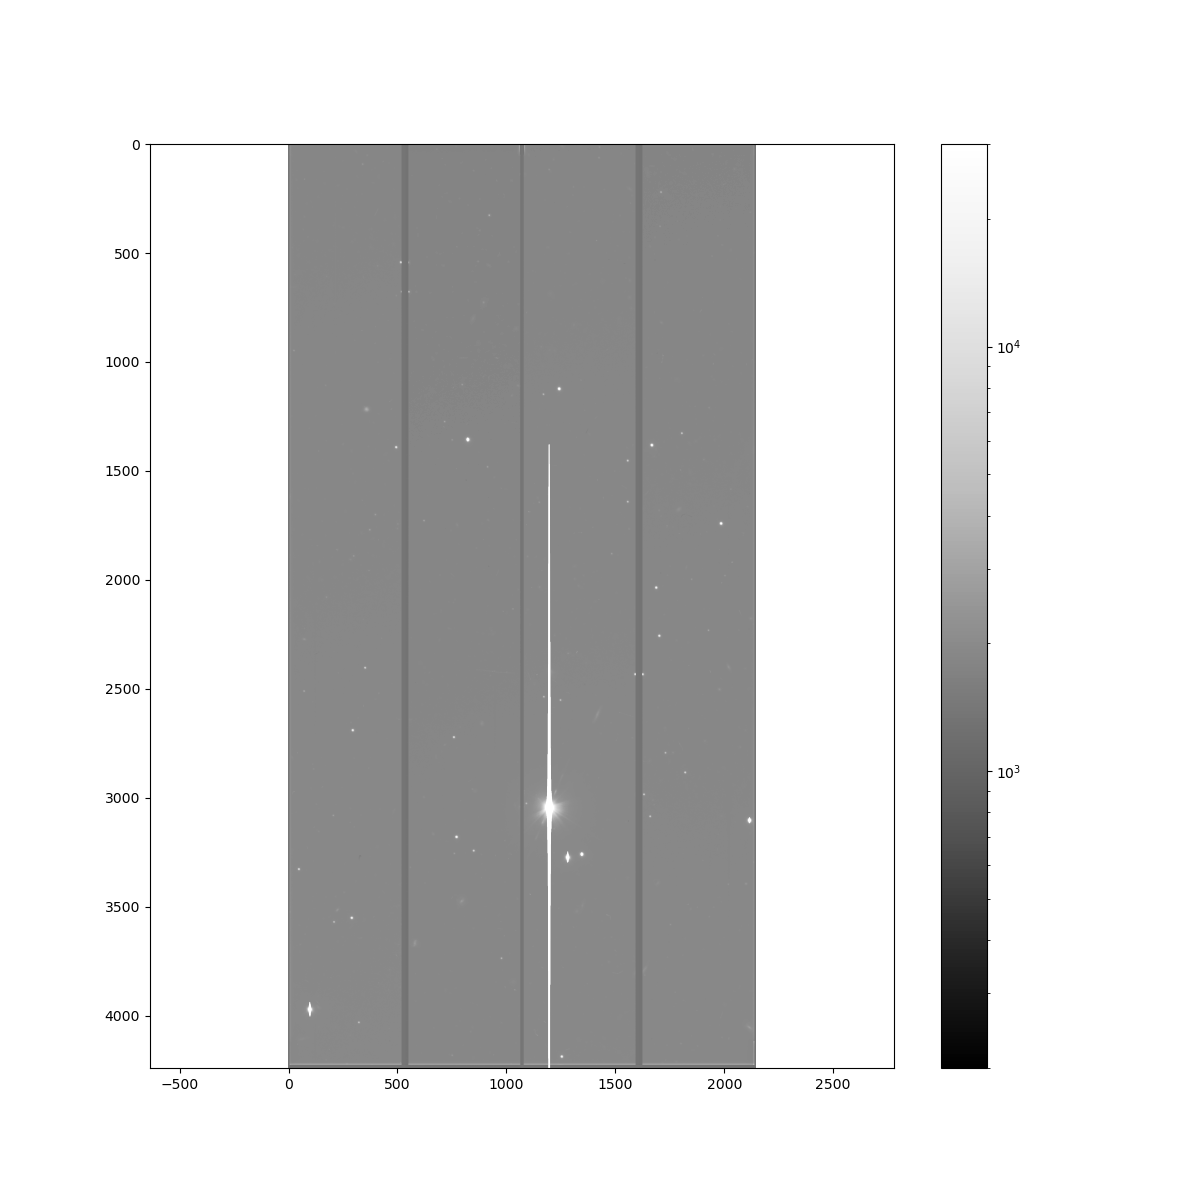

In [4]:
raw_image = raw.getImage().array
plt.figure(figsize=(12,12))
plt.imshow(raw_image, norm=LogNorm(vmin=200, vmax=30000), cmap=plt.cm.Greys_r)
plt.colorbar()
plt.axis('equal')

(-0.5, 2047.5, 4175.5, -0.5)

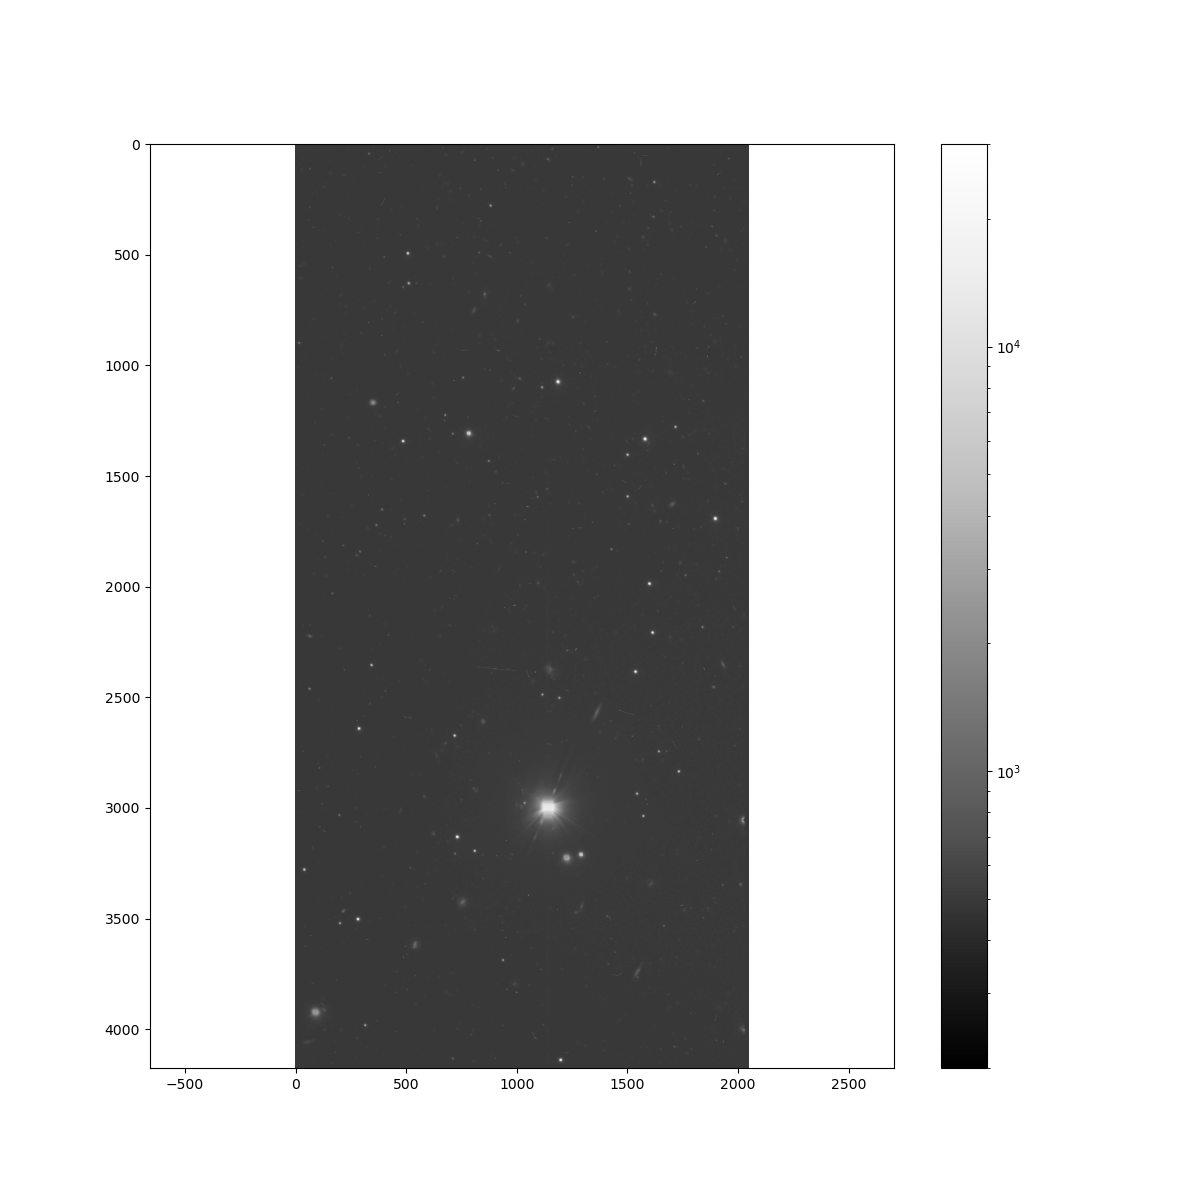

In [5]:
current_image = current.getImage().array
plt.figure(figsize=(12,12))
plt.imshow(current_image,  norm=LogNorm(vmin=200, vmax=30000), cmap=plt.cm.Greys_r)
plt.colorbar()
plt.axis('equal')

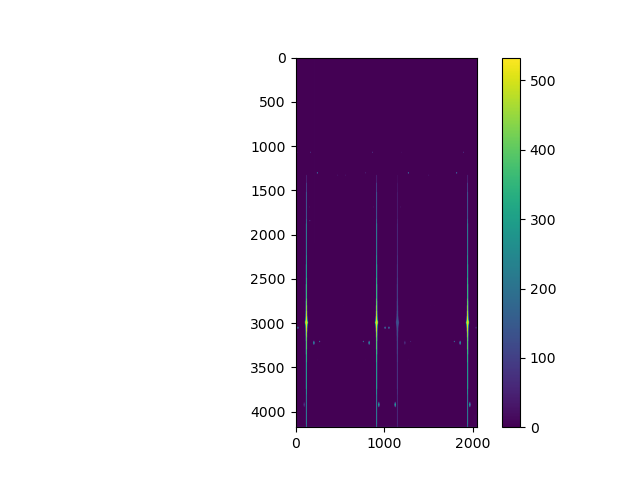

In [6]:
mask = current.getMask()
badMaskPlanes = ("NO_DATA", "INTRP", "BAD", "SAT", "EDGE")
#badMaskPlanes = ("SAT")
badPixelMask = mask.getPlaneBitMask(badMaskPlanes)
SATMask = (mask.array == badPixelMask).astype(int)
plt.figure()
plt.imshow(mask.array)
plt.colorbar()

In [24]:
mask_vals = np.unique(mask.array)
includesInterp = (mask_vals & 2**mask.getMaskPlane('INTRP')).astype(bool)
print(mask_vals[includesInterp])

[  5   6   7  21  23 134 135 151 261 277 517 533]


In [48]:
bad_interp = np.zeros_like(mask.array)
for val in mask_vals[includesInterp]:
    bad_interp = (bad_interp + (mask.array == val).astype(int))
bad_interp = bad_interp != 0 

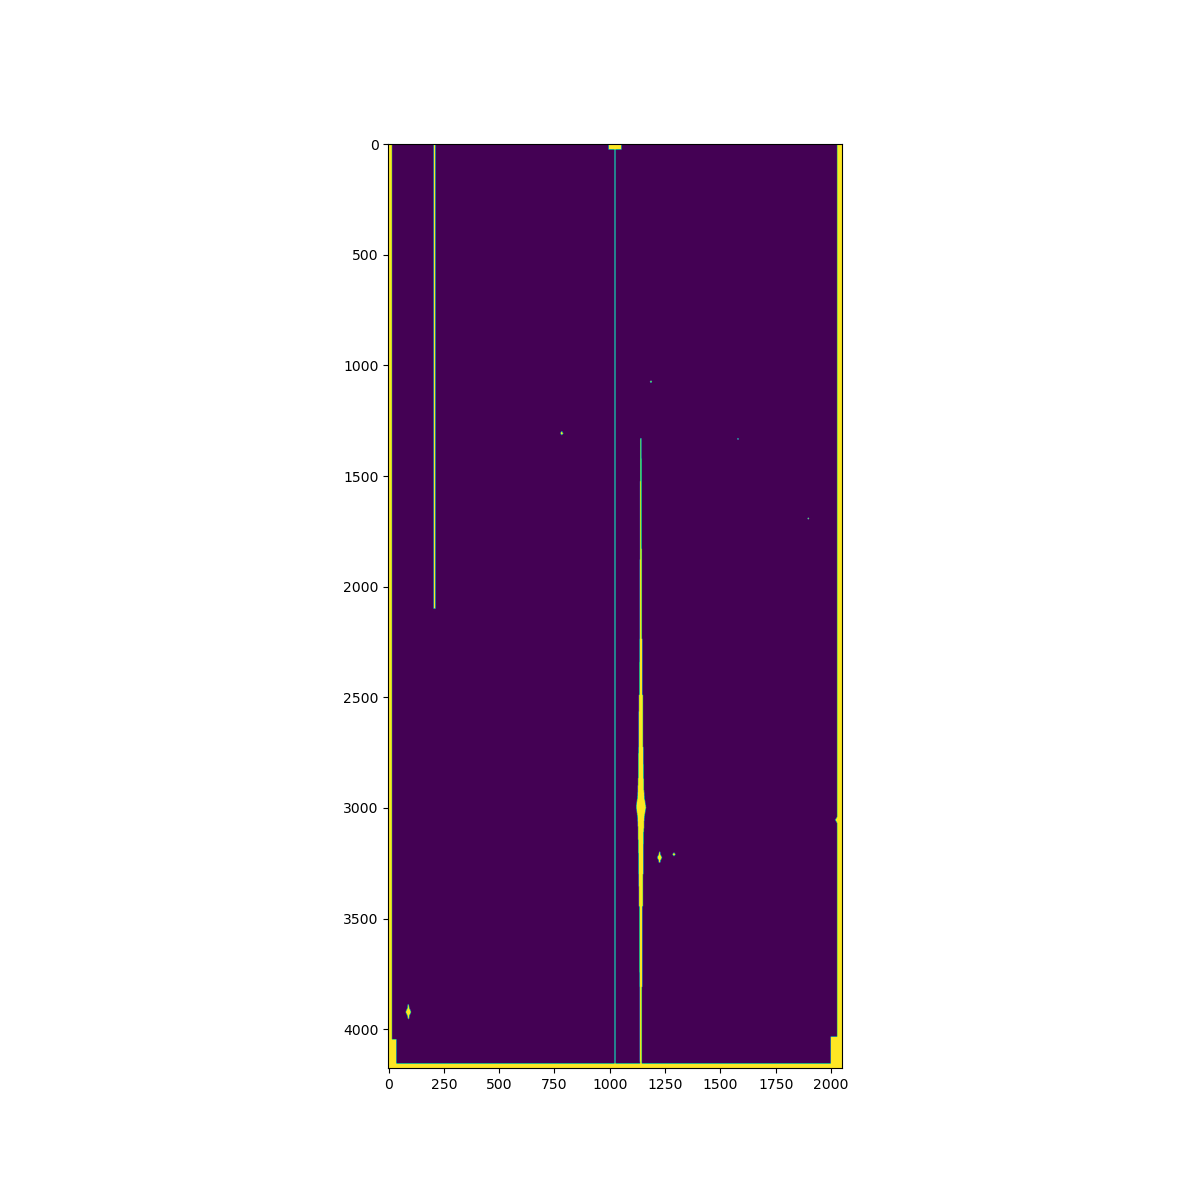

In [49]:
plt.figure(figsize=(12,12))
plt.imshow(bad_interp.astype(int))

In [50]:
print(np.sum(bad_interp))

291589


In [51]:
print(np.sum(~bad_interp))

8260859
